Libraries imported and their purpose
1. Tweepy : This library is used for accessing twitter api.
2. OAuthHandler : This is used for authentication purpose.
3. Matplotlib : This is used for visualization purpose.

In [1]:
import tweepy
from tweepy import OAuthHandler 
import sys, csv, re, json
from textblob import TextBlob
import matplotlib.pyplot as plt

Below are credentials of Twitter developer account which are used for authentication so that Twitter APIs can be used. 

In [2]:
consumerKey = 'y8v7390J9qadOIesXhSa57zZh'
consumerSecret = 'IHVGi52g7YQSHhlzFxX0RnQepsT44qGwOlZqbARp5pb9wbfaLr'
accessToken = '3255505609-sE3s5MzKSxh0HGimZssvk7PDHvjELCzZbKVnWq6'
accessTokenSecret = 'PYxmWaYPrk5wo2Rvs4GlQ5P5bWK3FpAYrbROH2eUiFqDo'

A OAuthHandler instance is created and consumer token and consumer secret token are passed to it.
Stored access token and secret access token so that it can be used inside callback function while fetching tweets.

In [3]:
authentication = tweepy.OAuthHandler(consumerKey, consumerSecret)
authentication.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authentication)

Taking input:
1. termToSearch : Twitter API will fetch tweets of this keyword depending on #Tags and words in the tweets
2. NumberOfTweets : API will fetch given number of tweets

In [4]:
termToSearch = input("Enter Keyword(#TAG) for fetching tweets: ")
NumberOfTweets = int(input("Enter number of tweets to be fetched: "))

Enter Keyword(#TAG) for fetching tweets: FIFA
Enter number of tweets to be fetched: 500


After calling the API with given input values, it will search and return a status having a JSON of tweets and other details as shown below. 

In [5]:
tweets = []
tweetText = []
tweets = tweepy.Cursor(api.search_tweets, q=termToSearch, lang = "en").items(NumberOfTweets)

Once the tweets are fetched they are stored in a csv file named 'result.csv'. It will create a file if there is no result.csv in given directory and if there is already present one, it will append the data in the file. 

In [6]:
csvFile = open('result.csv', 'a')
csvWriter = csv.writer(csvFile)

Tweets and retweets are cleaned now using a regular expression. This expression will remove the @metion of other and spaces. The cleaned data is appended in a list tweetText. 

In [7]:
for tweet in tweets:
            tweetText.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet.text).split()).encode('utf-8'))       

In [8]:
tweetText[0]

b'RT Frame 1 What Ghana produced from FIFA funds Frame 2 What Morocco pr\xe2\x80\xa6'

After creation of the list. The list is converted into dataframe and stored into a csv file 'result2.csv'

In [9]:
import pandas as pd
df = pd.DataFrame(tweetText)
df.to_csv('result2.csv', index=False)

Afinn is the lexicons library used for sentiment analysis in python. Below 'result4.csv' is used which contains around 1 million tweets.
The data is stored in the dataframe score_df having a column 'tweet_text' and then score of each tweet is calculated using function afinn.score and stored in a new column named 'score'.

In [10]:
from afinn import Afinn
afinn = Afinn()
score_df = pd.read_csv(r'result4.csv',encoding=' ISO-8859-1',header = None)
score_df.columns = ['tweet_text']
score_df['score'] = score_df.apply(lambda x :afinn.score(x.tweet_text),axis=1)

In [11]:
score_df.tail(10)

,tweet_text,score
1048566,Looking forward to a mini-break in Isle of Wig...,0.0
1048567,GRINGO STAR tonight. Southern garage. http://...,0.0
1048568,@DavidBass hee hee...I'll take rain over wind ...,3.0
1048569,today's message in the church service was deli...,5.0
1048570,"Back home, thought I'd done for the week, but ...",0.0
1048571,My GrandMa is making Dinenr with my Mum,0.0
1048572,Mid-morning snack time... A bowl of cheese noo...,0.0
1048573,@ShaDeLa same here say it like from the Termi...,4.0
1048574,@DestinyHope92 im great thaanks wbuu?,3.0
1048575,cant wait til her date this weekend,0.0


The above dataframe is stored in the file 'dataset1.csv'

In [12]:
score_df.to_csv('dataset1.csv',index=False)

Libraries: 
1. findspark : To make pyspark importable as a regular library. 
2. pyspark : Used as interface for apache spark in python.

Function Used:
1. SparkSession : An entry point to underlying PySpark functionalities to programmatically create PySpark RDD, dataframe.
2. SQLContext : Creates and returns a new session, with seperated SQL configurations, registered functions but sharing the same SparkContext. 
3. StructType, StructField : Collection of StructFields which defines column names, column data type.

In [13]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import StructType,StructField,IntegerType,TimestampType,FloatType,StringType,DoubleType

SparkSession is created using spark_session.builder builder pattern. Application name is "sentiment_analysis".
Host and port are configured using spark.driver.config and spark.driver.port which are 127.0.0.1 and 9999.

In [14]:
spark_session= pyspark.sql.SparkSession.builder.appName("sentiment_analysis").config("spark.driver.host", "127.0.0.1").config("spark.driver.port", "9999").getOrCreate()

In [15]:
spark_session

Column name and type are defined.

In [16]:
schema=StructType([
    StructField('TweetText',StringType(),True),
     StructField('Score',IntegerType(),True),
])

In [17]:
spark_df = spark_session.read.format('csv').option("header",True).option("schema",schema).load('dataset1.csv')

In [18]:
spark_df

DataFrame[tweet_text: string, score: string]

In [19]:
spark_df.show()

+--------------------+-----+
|          tweet_text|score|
+--------------------+-----+
|@switchfoot http:...| -2.0|
|is upset that he ...| -5.0|
|@Kenichan I dived...|  2.0|
|my whole body fee...| -2.0|
|@nationwideclass ...| -4.0|
|@Kwesidei not the...|  0.0|
|         Need a hug |  2.0|
|@LOLTrish hey  lo...|  7.0|
|@Tatiana_K nope t...|  0.0|
|@twittera que me ...|  0.0|
|spring break in p...|  0.0|
|I just re-pierced...|  0.0|
|@caregiving I cou...| -5.0|
|@octolinz16 It it...|  0.0|
|@smarrison i woul...| -1.0|
|@iamjazzyfizzle I...| -1.0|
|Hollis' death sce...| -7.0|
|about to file taxes |  0.0|
|@LettyA ahh ive a...|  3.0|
|@FakerPattyPattz ...|  1.0|
+--------------------+-----+
only showing top 20 rows



Created 10 partitions

In [20]:
data_partition = spark_df.repartition(10)

In [21]:
data_partition.rdd.getNumPartitions()

10

Folder with name 'partitions' is created.

In [22]:
data_partition.write.option("header",True).csv("parition")

List of the CSV files created after data partitions. 

In [23]:
import glob
import os
path = "C:\\Users\\hardi\\paritions"
print(path)
csv_files = glob.glob(os.path.join(path,"*.csv"))
print(csv_files)

C:\Users\hardi\paritions
['C:\\Users\\hardi\\paritions\\part-00000-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv', 'C:\\Users\\hardi\\paritions\\part-00001-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv', 'C:\\Users\\hardi\\paritions\\part-00002-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv', 'C:\\Users\\hardi\\paritions\\part-00003-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv', 'C:\\Users\\hardi\\paritions\\part-00004-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv', 'C:\\Users\\hardi\\paritions\\part-00005-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv', 'C:\\Users\\hardi\\paritions\\part-00006-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv', 'C:\\Users\\hardi\\paritions\\part-00007-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv', 'C:\\Users\\hardi\\paritions\\part-00008-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv', 'C:\\Users\\hardi\\paritions\\part-00009-ced1eecf-d97b-4d94-87d1-4f426a391052-c000.csv']


In [24]:
print(len(score_df))
polarity = 0
positive = 0
weak_positive = 0
strong_positive = 0
negative = 0
weak_negative = 0
strong_negative = 0
neutral = 0

1048576


In [25]:
numberOfTweets = len(score_df)

In [26]:
 for scores in score_df.tweet_text:
           
            analysis = TextBlob(scores)
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                weak_positive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                strong_positive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                weak_negative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                strong_negative += 1

In [27]:
print(neutral)
print(numberOfTweets)


378389
1048576


In [28]:
def percentageCalculation(typeOfTweet, TotalTweet):
        perc = 100 * float(typeOfTweet) / float(TotalTweet)
        return format(perc, '.2f')

In [29]:
positive_tweet = percentageCalculation(positive, numberOfTweets)
weak_positive_tweet = percentageCalculation(weak_positive, numberOfTweets)
strong_positive_tweet = percentageCalculation(strong_positive, numberOfTweets)
negative_tweet = percentageCalculation(negative, numberOfTweets)
weak_negative_tweet = percentageCalculation(weak_negative,numberOfTweets)
strong_negative_tweet = percentageCalculation(strong_negative, numberOfTweets)
neutrall_tweet = percentageCalculation(neutral, numberOfTweets)
polarity_tweet = polarity / numberOfTweets

In [30]:
print("Sentiment data analysis on " + termToSearch)

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weak Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strong Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weak Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strong Negative")

print("-----------------------------------")
print("Positive tweets by "+ str(positive_tweet))
print("Weak Positivetweets by "+str(weak_positive_tweet) )
print("Strong Positive tweets by "+str(strong_positive_tweet) )
print("Negative tweets by "+str(negative_tweet))
print("Weak Negative tweets by "+str(weak_negative_tweet))
print("Strong Negative tweets by "+str(strong_negative_tweet))
print("Neutral tweets by "+str(neutrall_tweet))

Sentiment data analysis on FIFA
-----------------------------------
Positive tweets by 11.96
Weak Positivetweets by 18.69
Strong Positive tweets by 6.70
Negative tweets by 8.87
Weak Negative tweets by 12.79
Strong Negative tweets by 4.01
Neutral tweets by 36.09


In [31]:
def plotPieChart( positive, weak_positive, strong_positive, negative, weak_negative, strong_negative, neutral, termToSearch, numberOfTweets):
        labels = ['Positive [' + str(positive_tweet) + '%]', 'Weakly Positive [' + str(weak_positive_tweet) + '%]','Strongly Positive [' + str(strong_positive_tweet) + '%]', 'Neutral [' + str(neutrall_tweet) + '%]',
                  'Negative [' + str(negative_tweet) + '%]', 'Weakly Negative [' + str(weak_negative_tweet) + '%]', 'Strongly Negative [' + str(strong_negative_tweet) + '%]']
        sizes = [positive_tweet, weak_positive_tweet, strong_positive_tweet, neutrall_tweet, negative_tweet, weak_negative_tweet, strong_negative_tweet]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('Sentiment Data Analysis on ' + termToSearch + ' by analyzing tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

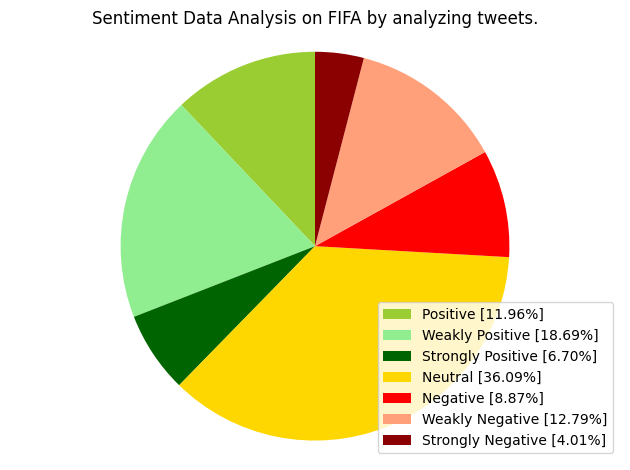

In [34]:
plotPieChart(positive_tweet, weak_positive_tweet, strong_positive_tweet, negative_tweet, weak_negative_tweet, strong_negative_tweet, neutrall_tweet, termToSearch, NumberOfTweets)